# Reproduce figures of the article

### 0 - Import Libraries

In [1]:
import torch
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import yaml
from fcts.figures import *
from fcts.utils import load_objects_from_yaml

### 1- Load datasets

In [2]:
#votes: matrix gathering votes for several laws and politicians (1: positive, 0: missing/abstention, -1: negative)
votes = np.loadtxt("data_parliament/votes.txt",delimiter=";").astype(int)

#deputes: Family name, Name, Political group 
deputes = json.load(open('data_parliament/deputes.json', 'r')) 

#texts:  political group demanding the law, title of demand, date, type (type of vote, type of majority, name of type of vote), 
texts = json.load(open('data_parliament/texts.json', 'r')) 

### 2- Load parameters from training 

In [3]:
loaded_parameters = load_objects_from_yaml('trained_parameters.yaml')

In [4]:
n1 = loaded_parameters['n1'] #number of rows  
n2 = loaded_parameters['n2'] #number of columns 

nq = loaded_parameters['nq'] #enter number of row classes
nl = loaded_parameters['nl'] #enter number of column classes

pi = np.array(loaded_parameters['pi'])

tau_1 = np.array(loaded_parameters['tau_1'])
tau_2 = np.array(loaded_parameters['tau_2'])
row_classes = tau_1.argmax(axis=1)
column_classes = tau_2.argmax(axis=1)

nu_a = np.array(loaded_parameters['nu_a'])
nu_b = np.array(loaded_parameters['nu_b'])
nu_c = np.array(loaded_parameters['nu_p'])
nu_d = np.array(loaded_parameters['nu_q'])

_, datafr = pol(column_classes, texts)

### 3- Figure reproduction

#### Figure 17

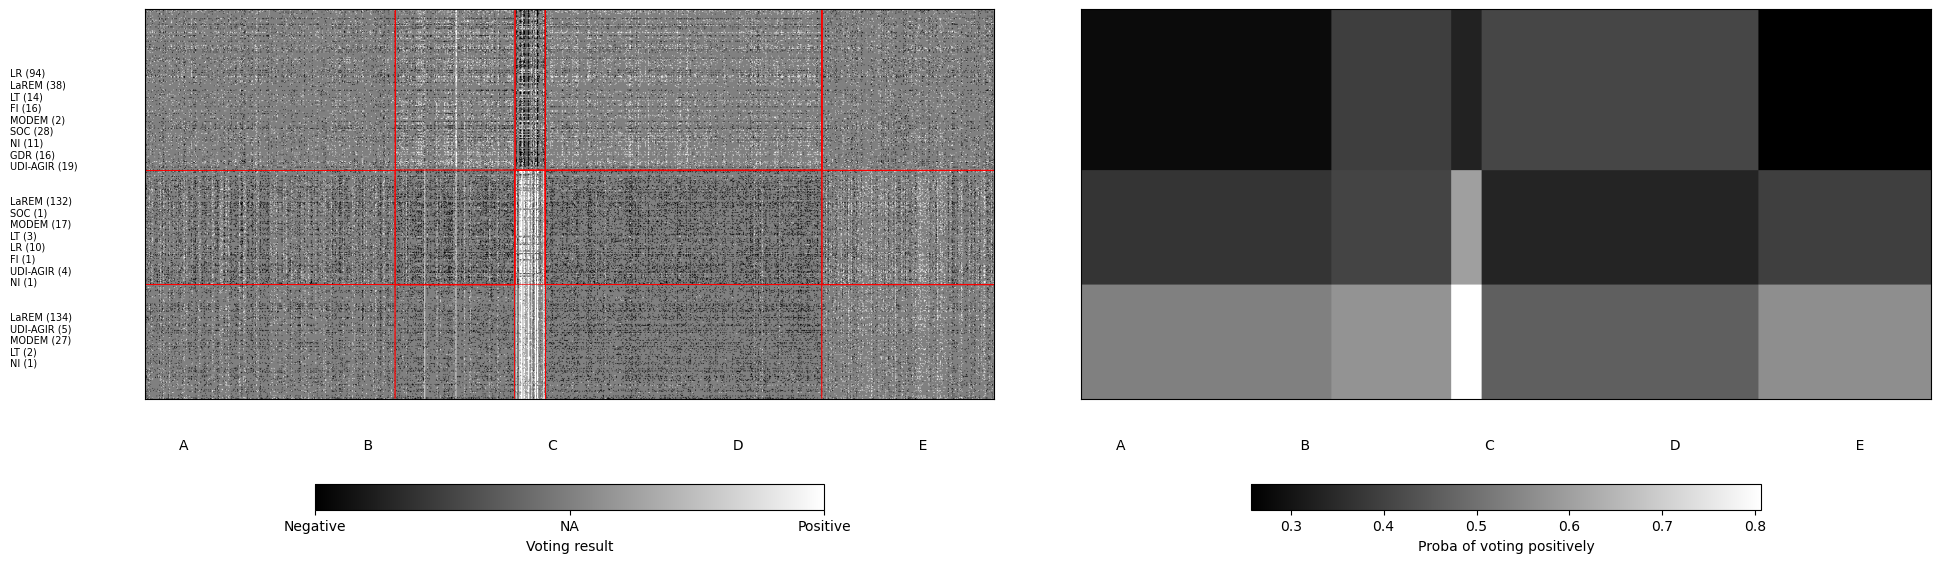

In [5]:
fig_17(votes, deputes, row_classes, column_classes, pi)

#### Figure 12

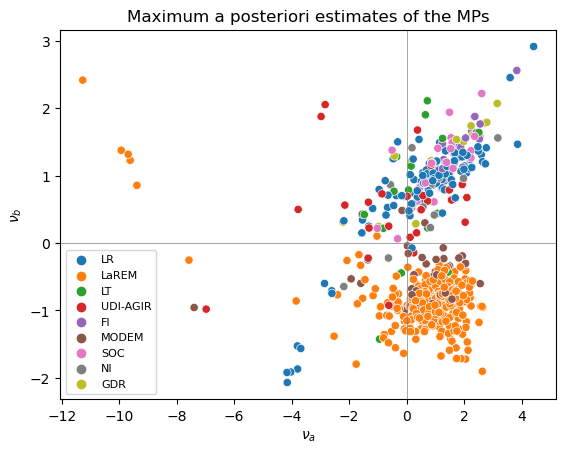

In [6]:
fig_nuAB(nu_a, nu_b, deputes)

#### Figure 18

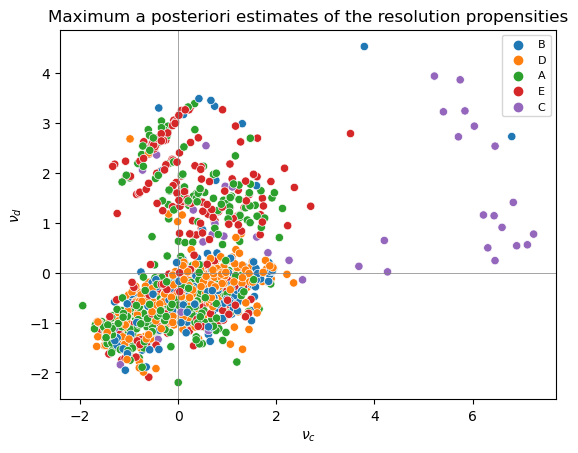

In [7]:
fig_nuCD(nu_c, nu_d, datafr, column_classes)